In [1]:
pip install tensorflow keras sklearn matplotlib pandas pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Uros\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=classes)])

In [5]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 47s 47ms/step - loss: 2.1472 - accuracy: 0.4371 - mean_io_u: 0.4963 - val_loss: 0.9442 - val_accuracy: 0.7559 - val_mean_io_u: 0.5120
Epoch 2/15
981/981 [==============================] - 44s 44ms/step - loss: 0.9477 - accuracy: 0.7129 - mean_io_u: 0.5082 - val_loss: 0.4074 - val_accuracy: 0.8866 - val_mean_io_u: 0.5346
Epoch 3/15
981/981 [==============================] - 47s 48ms/step - loss: 0.6160 - accuracy: 0.8116 - mean_io_u: 0.5250 - val_loss: 0.2316 - val_accuracy: 0.9325 - val_mean_io_u: 0.5717
Epoch 4/15
981/981 [==============================] - 48s 49ms/step - loss: 0.4333 - accuracy: 0.8714 - mean_io_u: 0.5459 - val_loss: 0.1592 - val_accuracy: 0.9517 - val_mean_io_u: 0.5456
Epoch 5/15
981/981 [==============================] - 45s 46ms/step - loss: 0.3460 - accuracy: 0.8954 - mean_io_u: 0.5624 - val_loss: 0.1275 - val_accuracy: 0.9658 - val_mean_io_u: 0.5667
Epoch 6/15
981/981 [==============================] - 49s 50

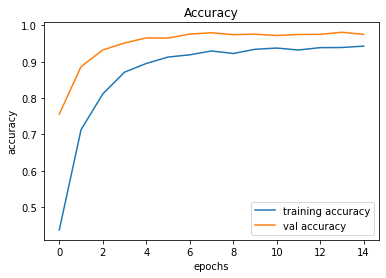

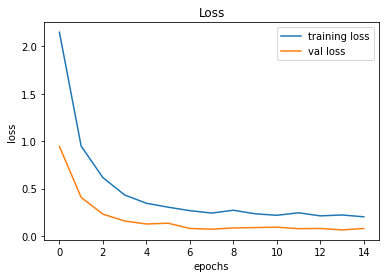

In [6]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [7]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

roi_x1 = y_test["Roi.X1"]
roi_x2 = y_test["Roi.Y1"]
roi_y1 = y_test["Roi.X2"]
roi_y2 = y_test["Roi.Y2"]

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

predict = model.predict(X_test) 
classes_x = np.argmax(predict,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))

0.9353127474267616


In [8]:
model.save('trafficio1.h5')

Turn right ahead


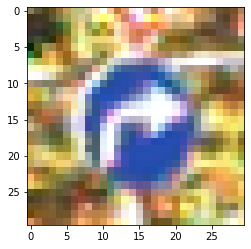

In [9]:
import numpy

def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def display_image(image):
    plt.imshow(image)

model = load_model('trafficio1.h5')

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

def classify():
    image = Image.open('Test/00003.png')
    image = image.resize((30,30))
    display_image(image)
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    
#     pred = model.predict_classes([image])[0]

    predict = model.predict([image])[0] 
    classes_x = np.argmax(predict,axis=0)
    
    sign = classes[classes_x+1]
    print(sign)

classify()